In [ ]:
import polars as pl
diamonds = pl.read_csv("../content/diamonds.csv.gz")
print(diamonds)


shape: (53_940, 10)
┌───────┬───────────┬───────┬─────────┬───┬───────┬──────┬──────┬──────┐
│ carat ┆ cut       ┆ color ┆ clarity ┆ … ┆ price ┆ x    ┆ y    ┆ z    │
│ ---   ┆ ---       ┆ ---   ┆ ---     ┆   ┆ ---   ┆ ---  ┆ ---  ┆ ---  │
│ f64   ┆ str       ┆ str   ┆ str     ┆   ┆ i64   ┆ f64  ┆ f64  ┆ f64  │
╞═══════╪═══════════╪═══════╪═════════╪═══╪═══════╪══════╪══════╪══════╡
│ 0.23  ┆ Ideal     ┆ E     ┆ SI2     ┆ … ┆ 326   ┆ 3.95 ┆ 3.98 ┆ 2.43 │
│ 0.21  ┆ Premium   ┆ E     ┆ SI1     ┆ … ┆ 326   ┆ 3.89 ┆ 3.84 ┆ 2.31 │
│ 0.23  ┆ Good      ┆ E     ┆ VS1     ┆ … ┆ 327   ┆ 4.05 ┆ 4.07 ┆ 2.31 │
│ 0.29  ┆ Premium   ┆ I     ┆ VS2     ┆ … ┆ 334   ┆ 4.2  ┆ 4.23 ┆ 2.63 │
│ 0.31  ┆ Good      ┆ J     ┆ SI2     ┆ … ┆ 335   ┆ 4.34 ┆ 4.35 ┆ 2.75 │
│ …     ┆ …         ┆ …     ┆ …       ┆ … ┆ …     ┆ …    ┆ …    ┆ …    │
│ 0.72  ┆ Ideal     ┆ D     ┆ SI1     ┆ … ┆ 2757  ┆ 5.75 ┆ 5.76 ┆ 3.5  │
│ 0.72  ┆ Good      ┆ D     ┆ SI1     ┆ … ┆ 2757  ┆ 5.69 ┆ 5.75 ┆ 3.61 │
│ 0.7   ┆ Very Good ┆ D     ┆ S

In [ ]:
diamonds = diamonds.with_columns(
  pl.col("cut").cast(pl.Enum(["Fair", "Good", "Very Good", "Premium", "Ideal"])),
  pl.col("color").cast(pl.Enum(["D", "E", "F", "G", "H", "I", "J"])),
  pl.col("clarity").cast(pl.Enum(["IF", "VVS1", "VVS2", "VS1", "VS2", "SI1", "SI2", "I1"]))
)
print(diamonds)

shape: (53_940, 10)
┌───────┬───────────┬───────┬─────────┬───┬───────┬──────┬──────┬──────┐
│ carat ┆ cut       ┆ color ┆ clarity ┆ … ┆ price ┆ x    ┆ y    ┆ z    │
│ ---   ┆ ---       ┆ ---   ┆ ---     ┆   ┆ ---   ┆ ---  ┆ ---  ┆ ---  │
│ f64   ┆ enum      ┆ enum  ┆ enum    ┆   ┆ i64   ┆ f64  ┆ f64  ┆ f64  │
╞═══════╪═══════════╪═══════╪═════════╪═══╪═══════╪══════╪══════╪══════╡
│ 0.23  ┆ Ideal     ┆ E     ┆ SI2     ┆ … ┆ 326   ┆ 3.95 ┆ 3.98 ┆ 2.43 │
│ 0.21  ┆ Premium   ┆ E     ┆ SI1     ┆ … ┆ 326   ┆ 3.89 ┆ 3.84 ┆ 2.31 │
│ 0.23  ┆ Good      ┆ E     ┆ VS1     ┆ … ┆ 327   ┆ 4.05 ┆ 4.07 ┆ 2.31 │
│ 0.29  ┆ Premium   ┆ I     ┆ VS2     ┆ … ┆ 334   ┆ 4.2  ┆ 4.23 ┆ 2.63 │
│ 0.31  ┆ Good      ┆ J     ┆ SI2     ┆ … ┆ 335   ┆ 4.34 ┆ 4.35 ┆ 2.75 │
│ …     ┆ …         ┆ …     ┆ …       ┆ … ┆ …     ┆ …    ┆ …    ┆ …    │
│ 0.72  ┆ Ideal     ┆ D     ┆ SI1     ┆ … ┆ 2757  ┆ 5.75 ┆ 5.76 ┆ 3.5  │
│ 0.72  ┆ Good      ┆ D     ┆ SI1     ┆ … ┆ 2757  ┆ 5.69 ┆ 5.75 ┆ 3.61 │
│ 0.7   ┆ Very Good ┆ D     ┆ S

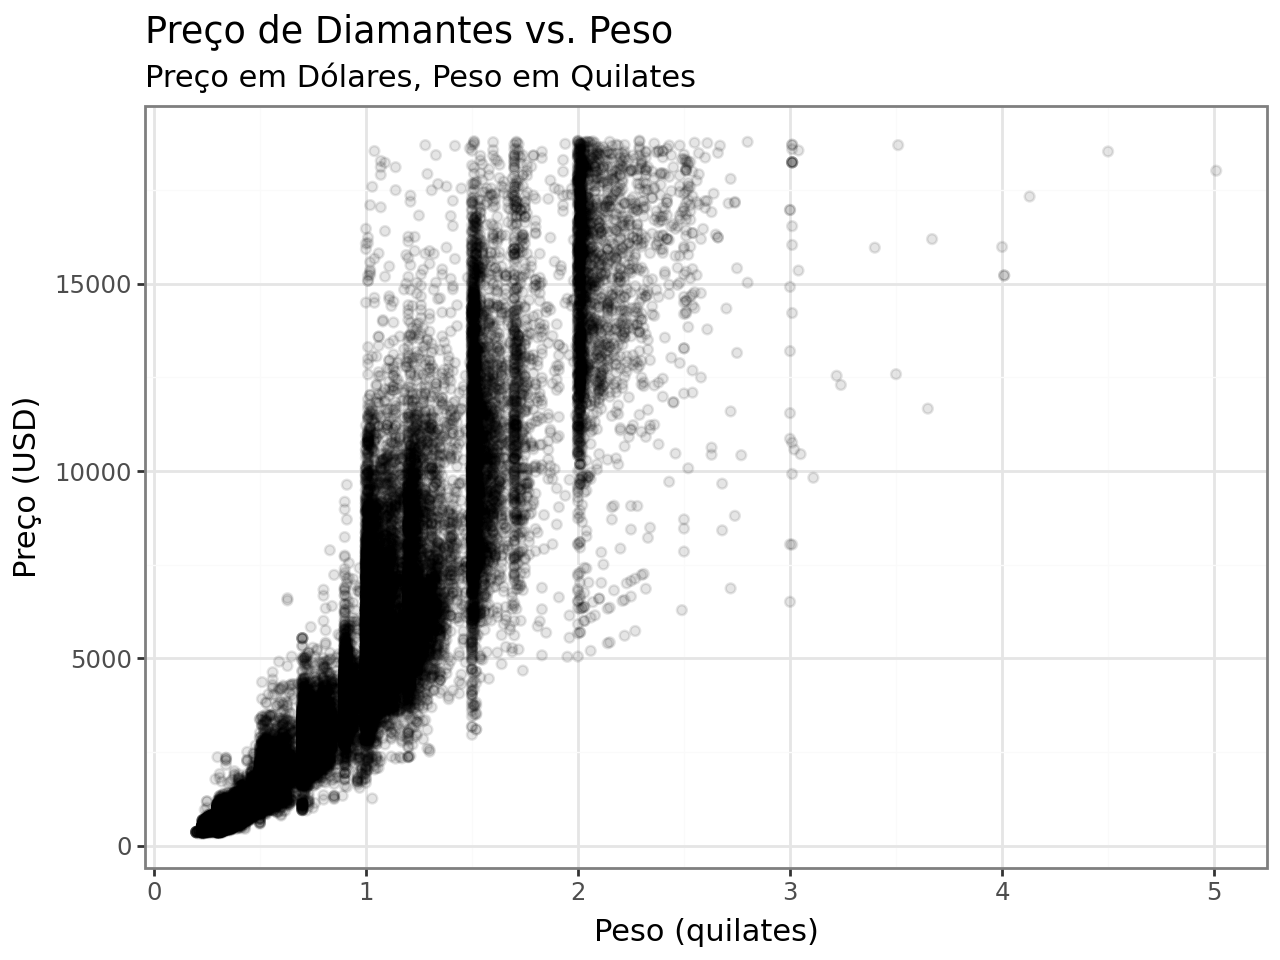

In [ ]:
from plotnine import ggplot, aes, geom_point, theme_bw, labs
(
  ggplot(diamonds) + aes(x = "carat", y = "price")
  + geom_point(alpha = 0.1)
  + theme_bw()
  + labs(x = "Peso (quilates)", y = "Preço (USD)",
         title = "Preço de Diamantes vs. Peso",
         subtitle = "Preço em Dólares, Peso em Quilates")
)

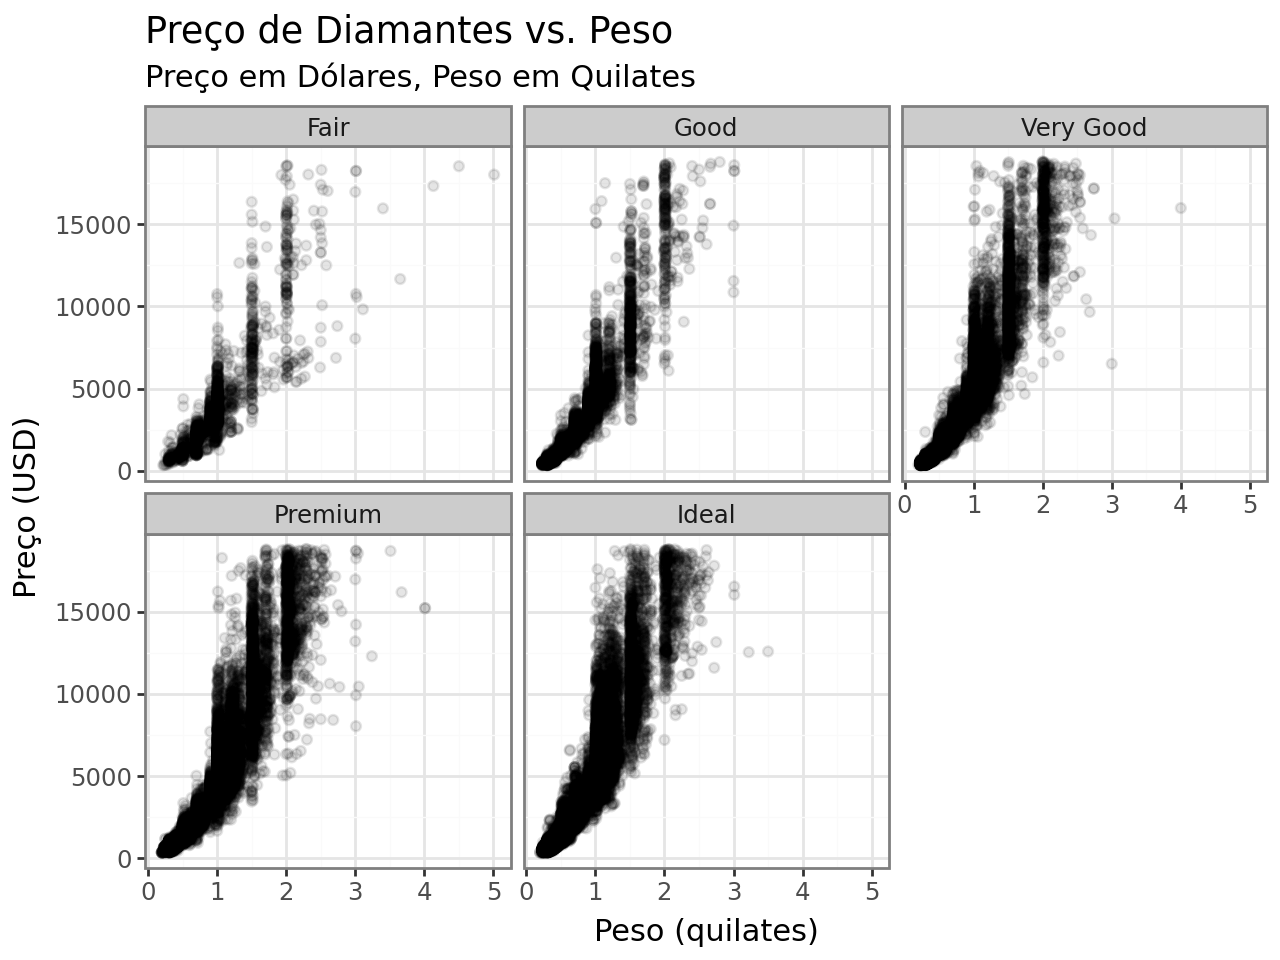

In [ ]:
from plotnine import facet_wrap
(
  ggplot(diamonds) + aes(x = "carat", y = "price")
  + geom_point(alpha = 0.1)
  + facet_wrap("cut")
  + theme_bw()
  + labs(x = "Peso (quilates)", y = "Preço (USD)",
         title = "Preço de Diamantes vs. Peso",
         subtitle = "Preço em Dólares, Peso em Quilates")
)

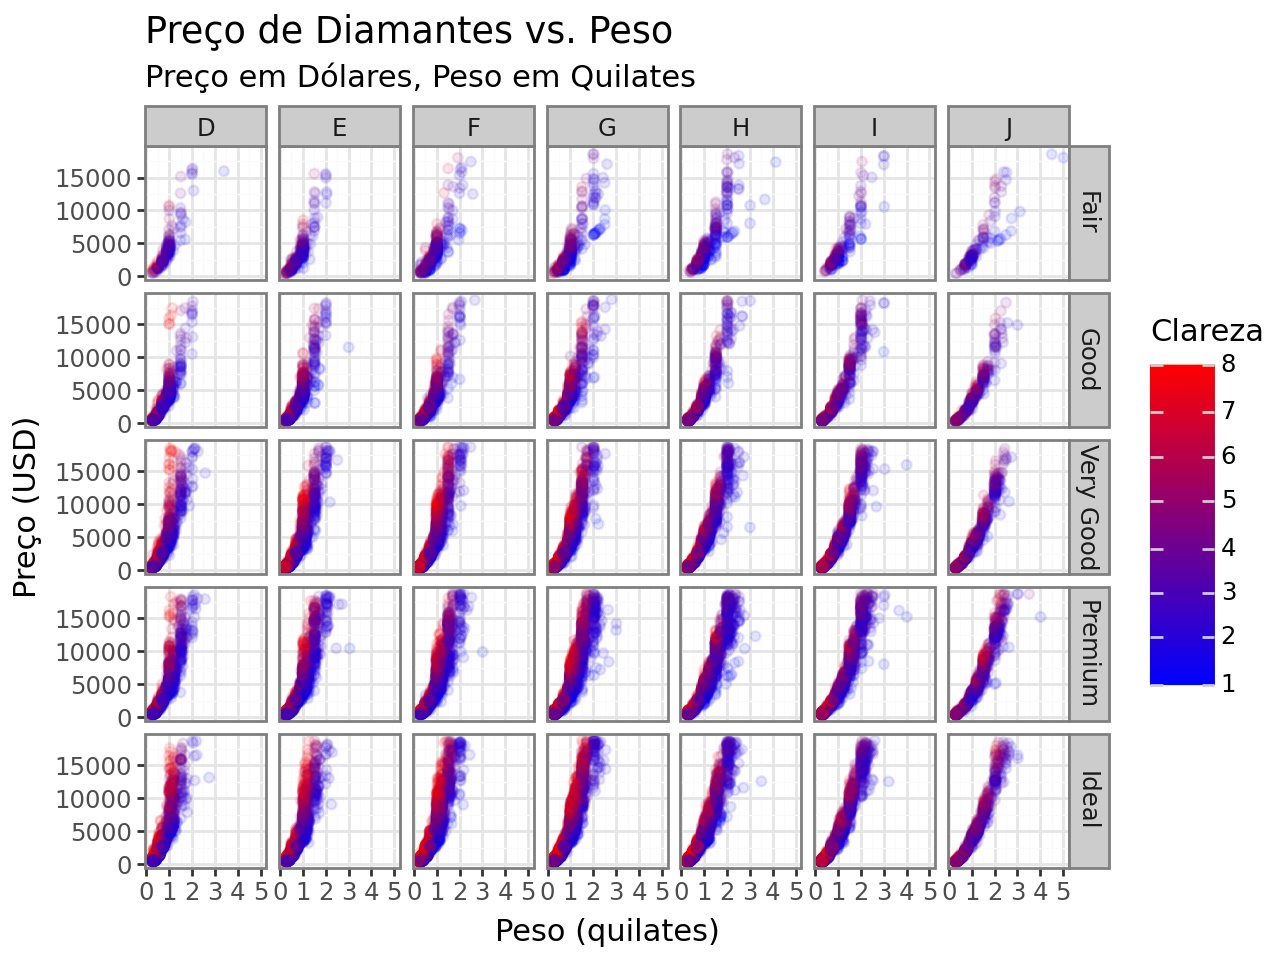

In [ ]:
from plotnine import facet_grid, scale_color_gradient

diamonds = diamonds.with_columns(
  (8 - pl.col("clarity").to_physical()).alias("clareza")
)

(
  ggplot(diamonds) + aes(x = "carat", y = "price", colour = "clareza")
  + geom_point(alpha = 0.1)
  + facet_grid(rows = "cut", cols = "color")
  + theme_bw()
  + labs(x = "Peso (quilates)", y = "Preço (USD)",
         title = "Preço de Diamantes vs. Peso",
         subtitle = "Preço em Dólares, Peso em Quilates")
  + scale_color_gradient(low='blue', high='red',
                         name='Clareza', breaks=range(1, 9),
                         labels=['1', '2', '3', '4', '5', '6', '7', '8'])
)